# Neural Network - Visualizations
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as manim
import numpy as np
import imageio as iio

from NN__utils import *

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.set_cmap('prism')

<Figure size 1152x576 with 0 Axes>

## 1. Perceptron
---

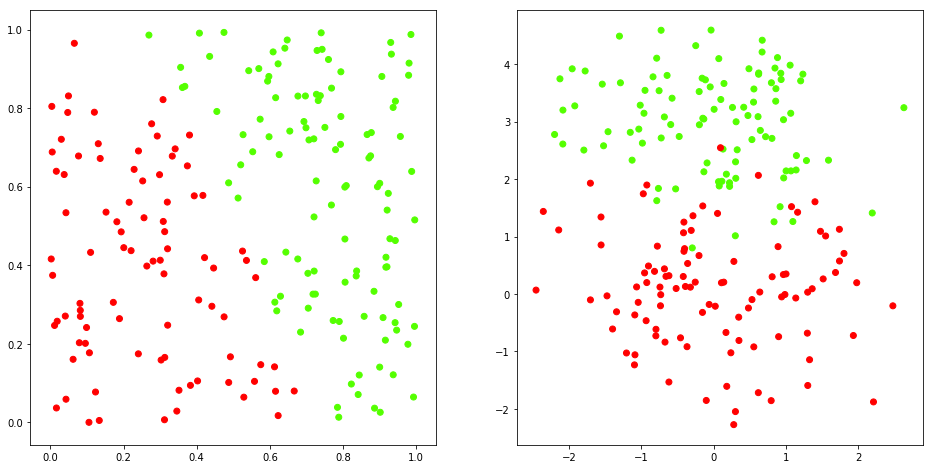

Wall time: 633 ms


In [3]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Synthetic data 1 and 2
x1, y1 = synthData1()
x2, y2 = synthData2()

# vizualization
axA.scatter(*x1, c=y1.ravel())
axB.scatter(*x2, c=y2.ravel())
fig.savefig('output/NN_perceptron_synthData.png', bbox_inches='tight')
plt.show()

In [4]:
class Perceptron(object):
    def __init__(self, dim=2, alpha=0.01, iters=16, seed=1):
        super(Perceptron, self).__init__()
        self._iters = iters
        self._alpha = alpha
        np.random.seed(seed)
        self._w = np.random.randn(dim, 1)
        self._b = np.random.random()
        self._cost = 0.0
    @property
    def iters(self):
        return self._iters
    @iters.setter
    def iters(self, iters):
        self._iters = int(iters)
    @property
    def alpha(self):
        return self._alpha
    @alpha.setter
    def alpha(self, alpha):
        self._alpha = int(alpha)
    @property
    def w(self):
        return self._w
    @property
    def b(self):
        return self._b
    @property
    def cost(self):
        return self._cost
    def fit(self, X, y):
        w, b = self._w, self._b
        alpha = self._alpha
        m = y.shape[1]
        for i in range(self._iters):
            Z = np.dot(w.T, X) + b
            A = 1/(1 + np.exp(-Z))
            dw = 1/m*np.dot(X, (A - y).T)
            db = 1/m*np.sum(A - y, axis=1)
            w = w - alpha*dw
            b = b - alpha*db
        self._w, self._b = w, b
        self._cost = -1/m*np.sum(y*np.log(A) + (1 - y)*np.log(1 - A), axis=1)
        self._cost = np.squeeze(self._cost)
    def pred(self, x, beta=0.5):
        w, b = self._w, self._b
        z = np.dot(w.T, x) + b
        a = 1/(1 + np.exp(-z))
        return a > beta

In [5]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

X = np.random.uniform(-3, 3, (2, 5000))
np.random.seed(sum([ord(e) for e in 'perceptron']))
p = Perceptron()

K = 20
def animation(frame):
    axA.cla(); axB.cla()
    p.iters = frame*1000 + 1
    p.fit(x1, y1)
    y1_hat = p.pred(X)
    p.fit(x2, y2)
    y2_hat = p.pred(X)
    axA.scatter(*X, c=y1_hat.ravel(), marker='*',
                alpha=0.05, edgecolors='none', s=512)
    axA.scatter(*x1, c=y1.ravel())
    axB.scatter(*X, c=y2_hat.ravel(), marker='*',
                alpha=0.05, edgecolors='none', s=512)
    axB.scatter(*x2, c=y2.ravel())
    fig.suptitle('learning rate = {0} | iter = {1} | cost = {2:.3f}'.format(p.alpha, p.iters - 1, p.cost))
    
    return fig.canvas.draw()

anim = manim.FuncAnimation(fig, animation, frames=K, interval=500)
    
anim.save('output/NN_perceptron.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert output/NN_perceptron.gif -loop 0 output/NN_perceptron.gif
! echo GIF exported and reconverted. Disregard any message above.

GIF exported and reconverted. Disregard any message above.
Wall time: 36.1 s
